## Using the Quantum Audio Module


#### For building  and manipulating quantum audio representations

The `quantumaudio` module implements a QuantumAudio class that is able to handle the encoding/decoding process of some quantum audio representations, such as: Building a quantum circuit for preparing and measuring the quantum audio state; simulating the circuit in Qiskit's *aer_simulator*; running the circuit in real hardware using *IBMQ* (as long as you have an account, provider and backend); necessary pre and post processing according to each encoding scheme; plotting and listening the retrieved sound.

The available encoding schemes are:

+ QPAM - Quantum Probability Amplitude Modulation (Simple quantum superposition or "Amplitude Encoding") - `'qpam'`
+ SQPAM - Single-Qubit Probability Amplitude Modulation (similar to FRQI image representations) - `'sqpam'`
+ QSM - Quantum State Modulation (also known as FRQA) - `'qsm'`

For more information regarding the representations above, you can refer to [this book chapter](https://link.springer.com/chapter/10.1007/978-3-031-13909-3_10), or its abridged pre-release draft in [ArXiv](https://arxiv.org/abs/2301.01595)

### Using the package

First of all, make sure you have all of the following dependencies installed:

- numpy
- matplotlib
- IPython.display
- bitstring
- qiskit

If you are on a Linux system, you might be able to install the dependencies by uncommenting and running this line:

In [1]:
#pip install numpy matplotlib ipython bitstring qiskit

If you have "pip installed" the *quantumaudio* module, it should have downloaded all of the required dependencies:

In [2]:
#pip install quantumaudio

In [3]:
import numpy as np
import quantumaudio as qa
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

Then, we create/load some example digital audio. QPAM and SQPAM are representations that can handle arrays with floating point or decimal numbers from -1 to 1 (somewhat similar to a PCM .wav or .flac file). In this example, we are using an audio signal with 8 samples:

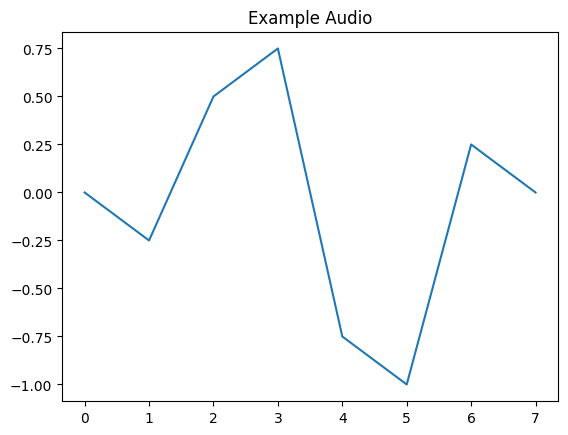

In [4]:
digital_audio = np.array([0., -0.25, 0.5 , 0.75,  -0.75  ,  -1.,  0.25 ,  0.])
plt.plot(digital_audio)
plt.title("Example Audio")
plt.show()

This is the current workflow for using the *quantumaudio* module: The QuantumAudio class encapsulates everything, from input, preprocessing, circuit generation, qiskit jobs, audio reconstruction and output. 

The user chooses which encoding technique to use while instantiating a QuantumAudio object. It will then refer to specific encoder subclass methods.

In [5]:
# qsound = qa.QuantumAudio('ENCODONG_SCHEME_HERE')

After instantiation, the first method to be used `load_input()` will load a copy of the input audio inside the object. It will print out the space requirements of the circuit.

In [6]:
qsound_qpam = qa.QuantumAudio('qpam')
qsound_qpam.load_input(digital_audio)

qsound_sqpam = qa.QuantumAudio('sqpam')
qsound_sqpam.load_input(digital_audio)

For this input, the QPAM representation will require:
         3 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.
For this input, the SQPAM representation will require:
         3 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


QuantumAudio

The loaded signal is acessible via the `input` attribute.

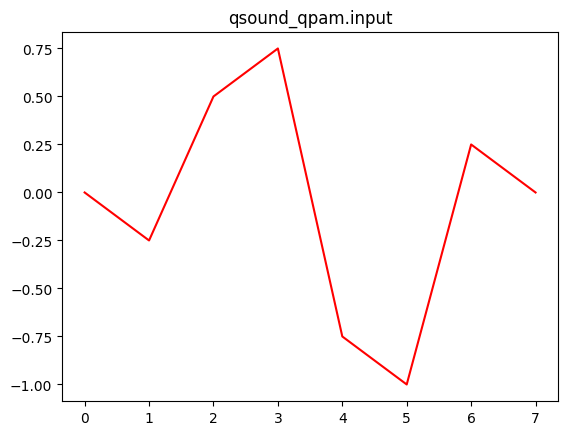

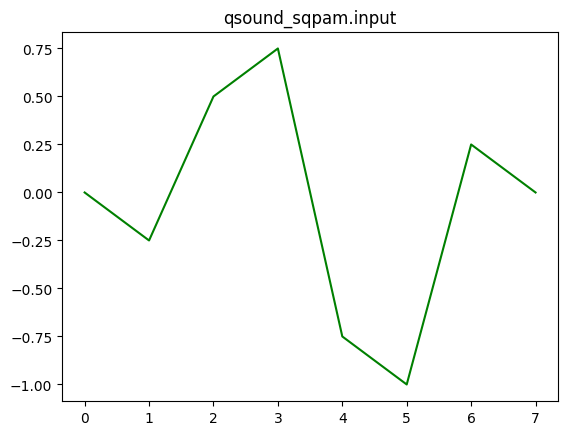

In [7]:
plt.plot(qsound_qpam.input, 'r')
plt.title('qsound_qpam.input')
plt.show()
plt.plot(qsound_sqpam.input, 'g')
plt.title('qsound_sqpam.input')
plt.show()

However, the same *digital_audio* example will NOT work with QSM. The QSM works with integer values only, as it expects a *quantized* signal, so it will round the numbers by default, removing all of the decimals and destroying the input, as shown:

For this input, the QSM representation will require:
         3 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


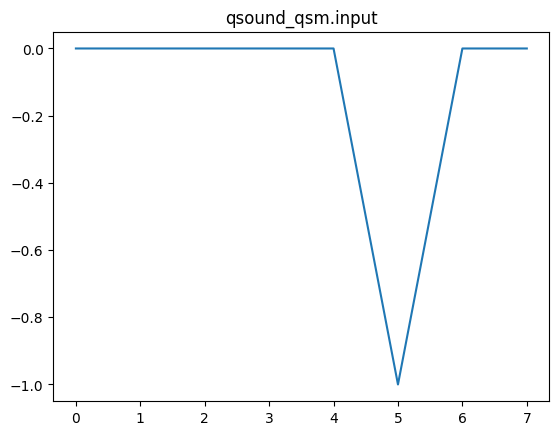

In [8]:
qsound_qsm = qa.QuantumAudio('qsm')
qsound_qsm.load_input(digital_audio)

plt.plot(qsound_qsm.input)
plt.title('qsound_qsm.input')
plt.show()

To load an input to the QSM encoder, we need to quantize (or re-quantize) the amplitudes of our signal. In this example, we have conveniently built a *digital_audio* simulating a PCM audio with 3-bit depth quantization. So we only need to multiply our signal by $2^{bitDepth -1}$ and retrieve the quantized version of the signal:

In [9]:
bit_depth=3
quantized_ditial_audio = digital_audio*(2**(bit_depth-1))

print(quantized_ditial_audio)

[ 0. -1.  2.  3. -3. -4.  1.  0.]


(To prove that this quantization also holds for *actual* sound files, uncomment the following block and load a typical 1 second of audio, 44100 Hz, 16-bit depth using and check. We used a CC sweep file found in [Freesound.org](https://freesound.org/people/MarcosPurziani/sounds/537479/) (Note: For this tutorial, this file would be too large to simulate).

Also Note: this requires the `soundfile` package.

In [10]:
# import soundfile as sf

# real_audio = sf.read('sweep_2_22000_log.wav')[0]

# bit_depth=16
# quantized_real_audio = real_audio*(2**(bit_depth-1))

# print(quantized_real_audio)

Now we can load the quantized version ou our example audio to QSM, by specifying the *bit depth* as an additional argument. Remeber that the bit deph will also dictate the amount of qubits necessary to store the amplitude information.

For this input, the QSM representation will require:
         3 qubits for encoding time information and 
         3 qubits for encoding ampĺitude information.


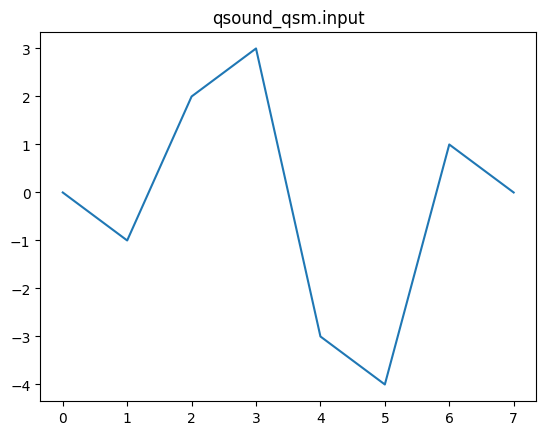

In [11]:
qsound_qsm = qa.QuantumAudio('qsm')
qsound_qsm.load_input(quantized_ditial_audio, 3)

plt.plot(qsound_qsm.input)
plt.title('qsound_qsm.input')
plt.show()

#### Note:
For usability reasons, QPAM and SQPAM can also handle quantized signals. The following code does exactly the same thing as before:

For this input, the QPAM representation will require:
         3 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.
For this input, the SQPAM representation will require:
         3 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


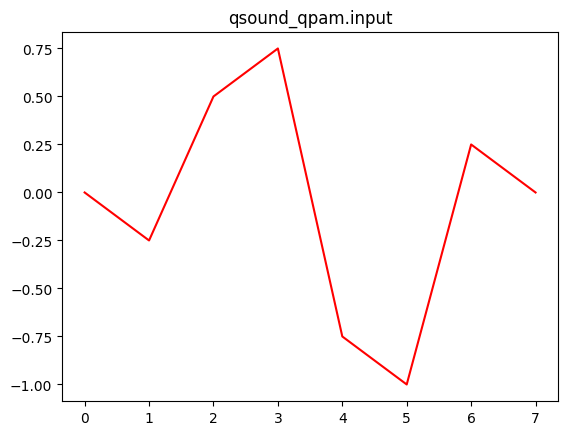

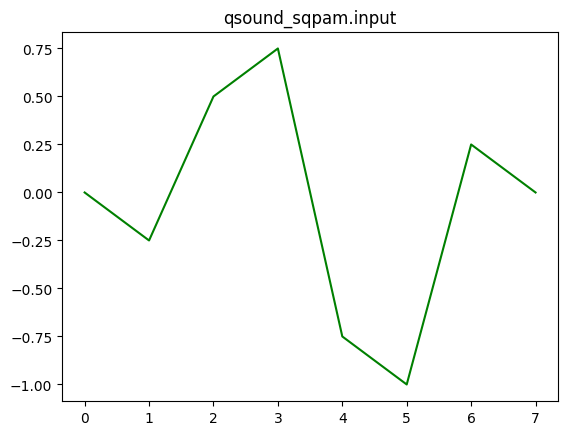

In [12]:
# qsound__qpam = qa.QuantumAudio('qpam')
qsound_qpam.load_input(quantized_ditial_audio, 3)

# qsound_sqpam = qa.QuantumAudio('sqpam')
qsound_sqpam.load_input(quantized_ditial_audio, 3)

plt.plot(qsound_qpam.input, 'r')
plt.title('qsound_qpam.input')
plt.show()
plt.plot(qsound_sqpam.input, 'g')
plt.title('qsound_sqpam.input')
plt.show()

This means that when working with quantized signals, we can easily switch between quantum audio representations - at least for encoding purposes (any additional quantum algorithm will have dramatically different impacts on each representation).

Now, let's generate quantum circuits with 3 steps: 

1. Converting/preprocessing the signal for a specified encoding scheme (for example, qpam converts the signal into probability amplitudes, sqpam creates an array of angles) - This is done internally by the QuantumAudio class when calling the `prepare()` method.
2. Generating a Preparation circuit for the input, which encodes the classical information into the quantum system acording to the representation - this is also done with the `prepare()` method
- (any custom quantum circuit, (aka, signal processing) could be applied at this point, by acessing the `circuit` attribute - qsound.circuit)
3. Inserting measurement instructions at the end of the circuit - measure() method

For now, we are only trying to prepare the quantum audio state and then measure it back: a *Quantum Audio Bypass Circuit*

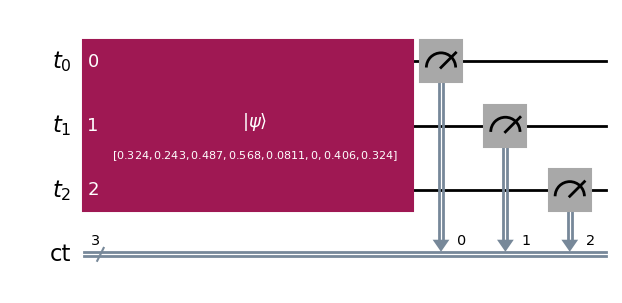

In [13]:
qsound_qpam.prepare()
qsound_qpam.measure()
qsound_qpam.circuit.draw('mpl')

If you are a one-liner, fell free to write everything in a single line. This is the advantage of the QuantumAudio class, and may be very useful for live performances:

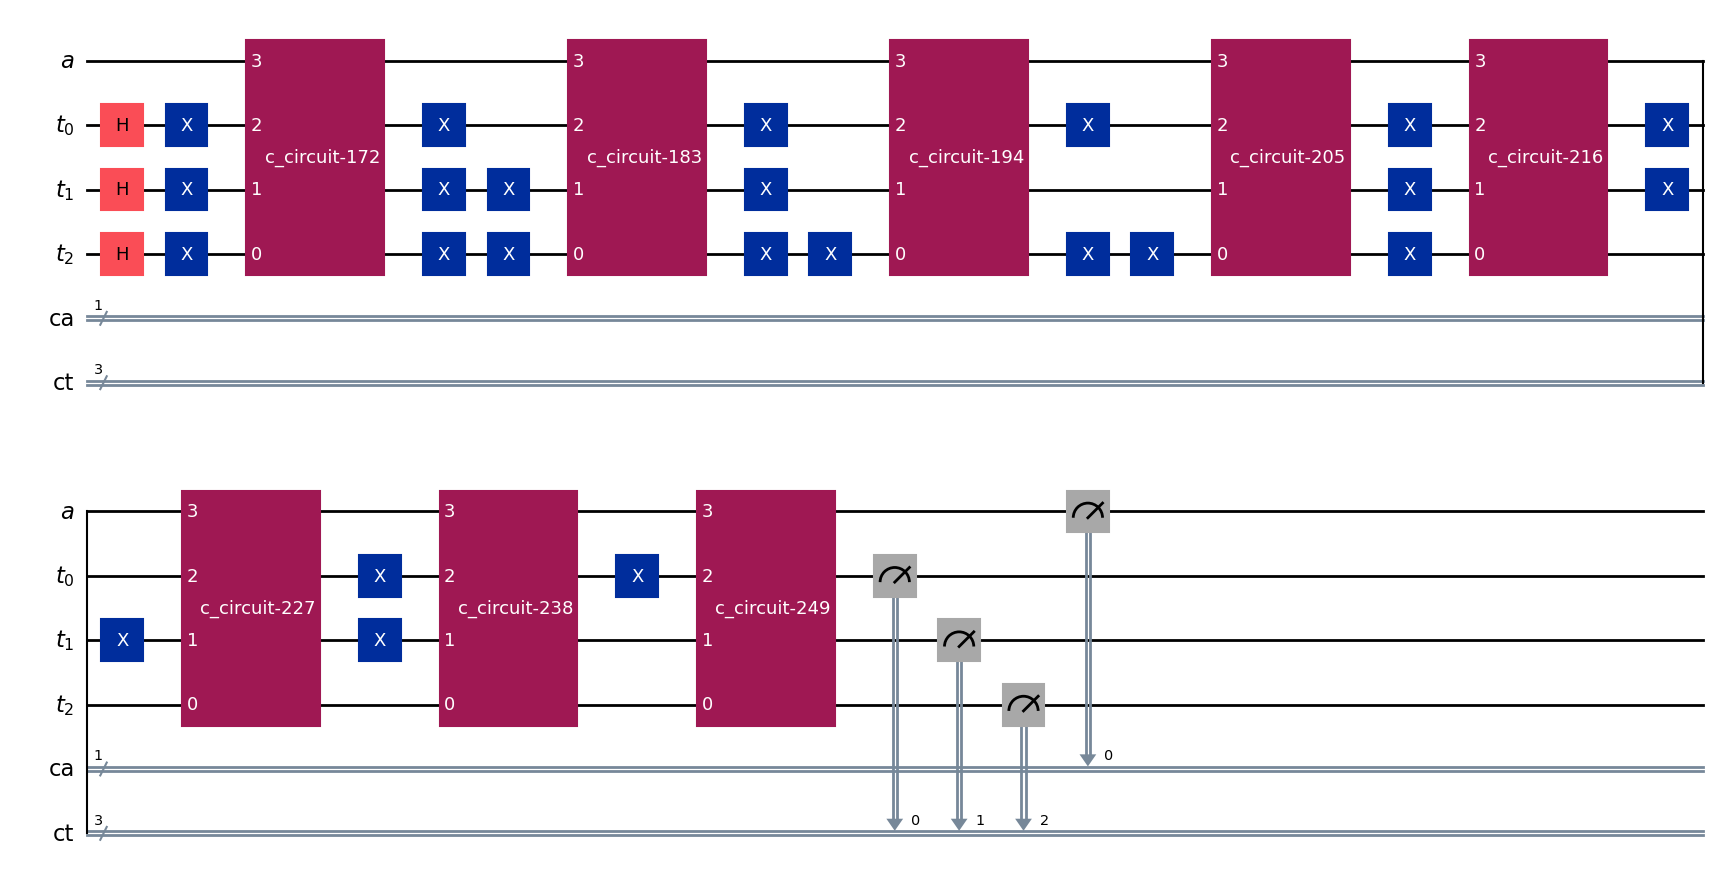

In [14]:
qsound_sqpam.prepare().measure().circuit.draw('mpl')

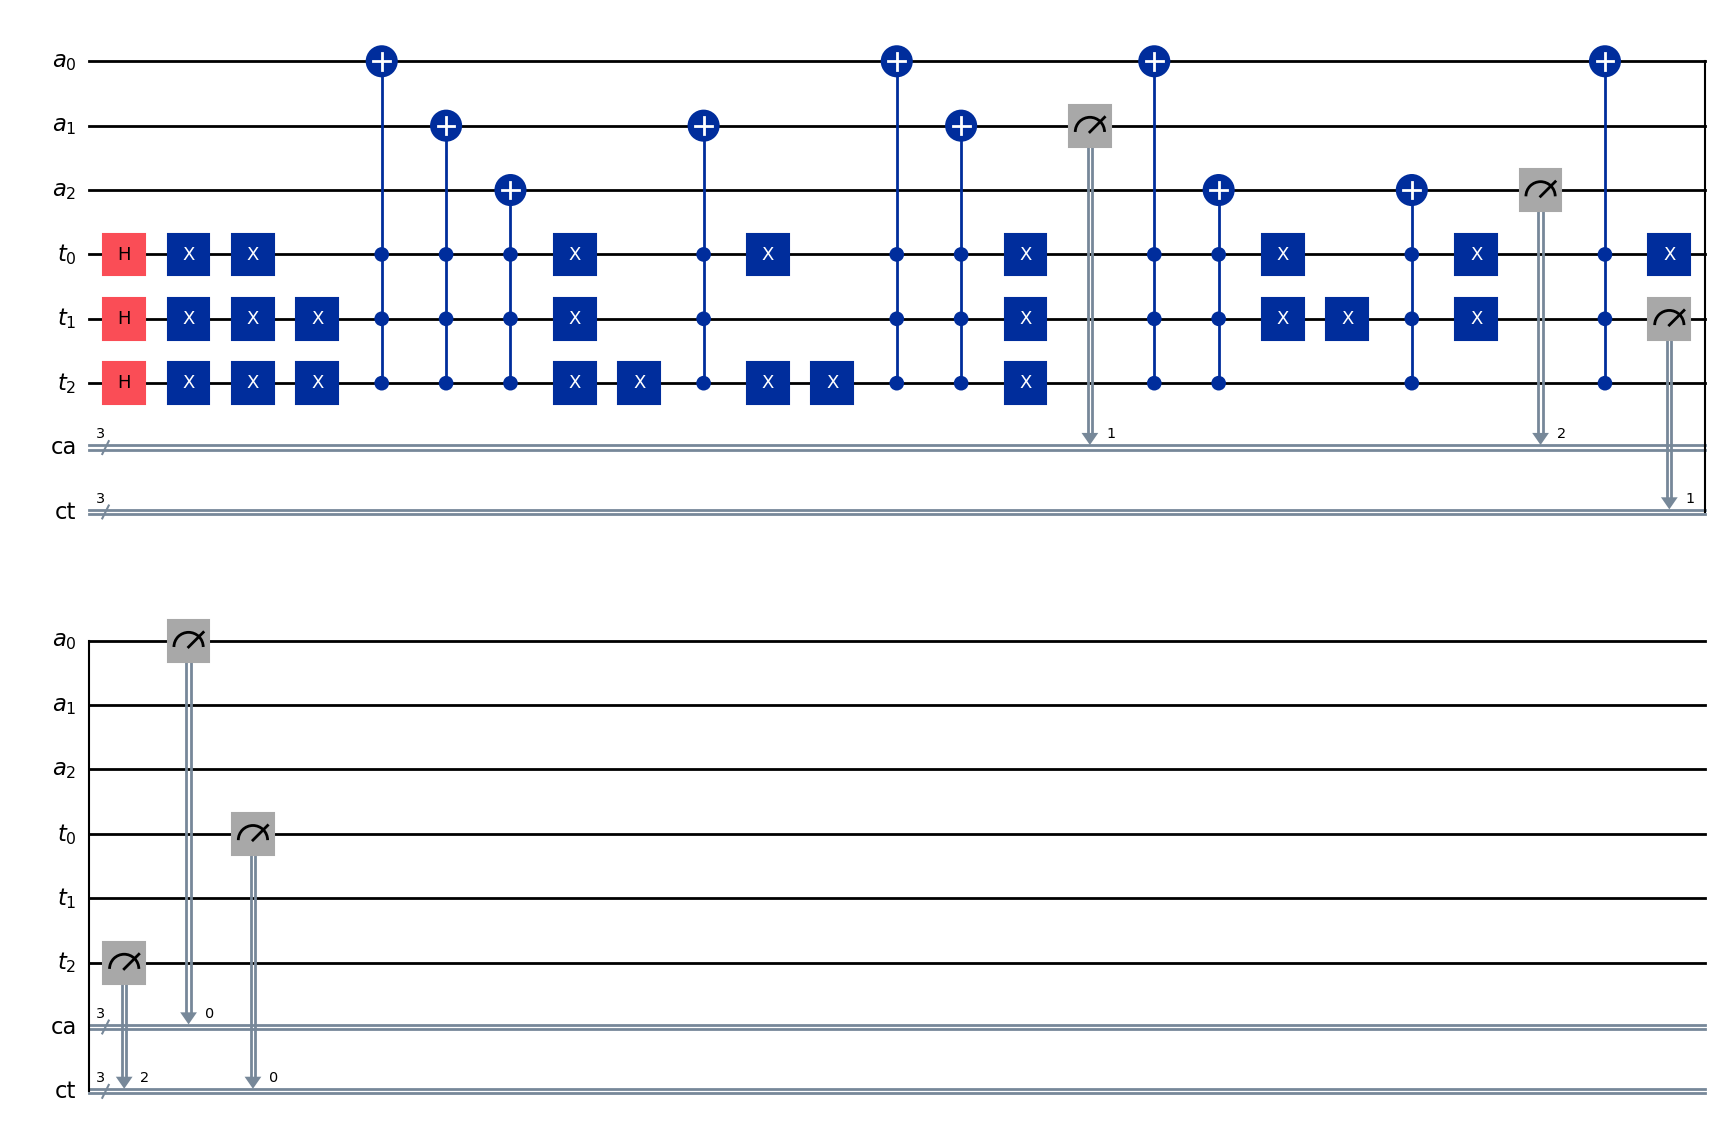

In [15]:
qsound_qsm.prepare().measure().circuit.draw('mpl')

Now that we have a quantum circuit, we can run it on *aer_simutator*, or use it elsewhere. There are attributes storing qiskit `result` and `counts`.

**QPAM:**

Result(backend_name='aer_simulator', backend_version='0.15.0', qobj_id='', job_id='97dd898f-7198-463b-b37a-d7a73683e459', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 98, '0x3': 325, '0x0': 114, '0x2': 251, '0x4': 6, '0x6': 155, '0x1': 51}), header=QobjExperimentHeader(creg_sizes=[['ct', 3]], global_phase=3.141592653589793, memory_slots=3, n_qubits=3, name='circuit-170', qreg_sizes=[['t', 3]], metadata={}), status=DONE, seed_simulator=3095878963, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 1, 'parallel_shots': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'time_taken': 0.003258125, 'measure_sampling': False, 'num_clbits': 3, 'max_memory_mb': 8192, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'num_qubits': 3, 'method': 'statevector', 'required_memory_mb': 1, 'fusion': {'enabled':

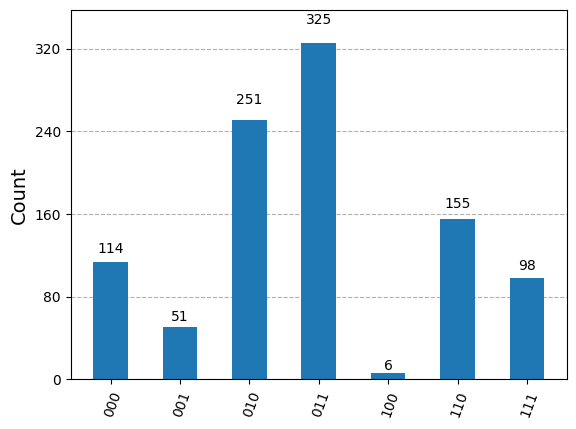

In [16]:
# Default values: QuantumAudio.run(shots=10, backend_name='aer_simulator', provider=Aer)

# Simulating qsound_qpam.circuit in 'aer_simulator' with 1 thousand shots:
shots = 1000
qsound_qpam.run(shots)
print(qsound_qpam.result)
print('-----------------------------------')
print(qsound_qpam.counts)
plot_histogram(qsound_qpam.counts)


**SQPAM:**

{'000 0': 59, '111 0': 70, '100 1': 16, '011 1': 115, '010 1': 78, '101 0': 135, '001 0': 70, '000 1': 63, '001 1': 45, '110 1': 94, '111 1': 65, '011 0': 14, '110 0': 42, '010 0': 28, '100 0': 106}


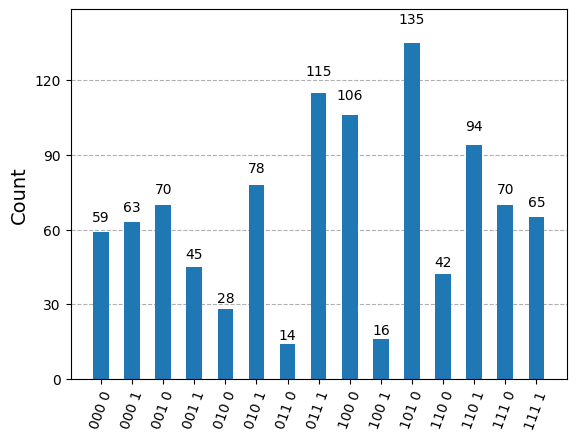

In [17]:
qsound_sqpam.run(shots)
print(qsound_sqpam.counts)
plot_histogram(qsound_sqpam.counts)

**QSM:**

{'110 001': 135, '001 111': 121, '100 101': 110, '111 000': 123, '101 100': 151, '011 011': 106, '010 010': 130, '000 000': 124}


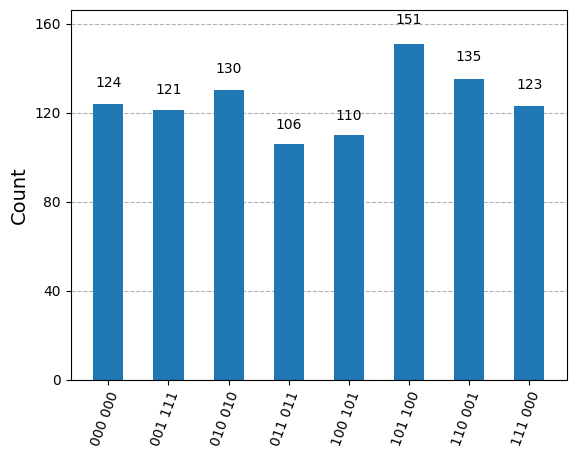

In [18]:
qsound_qsm.run(shots)
print(qsound_qsm.counts)
plot_histogram(qsound_qsm.counts)

The last step of the process is to decode/reconstruct the histogram output into a digital audio output using the `reconstruct_audio()` method:

**QPAM**

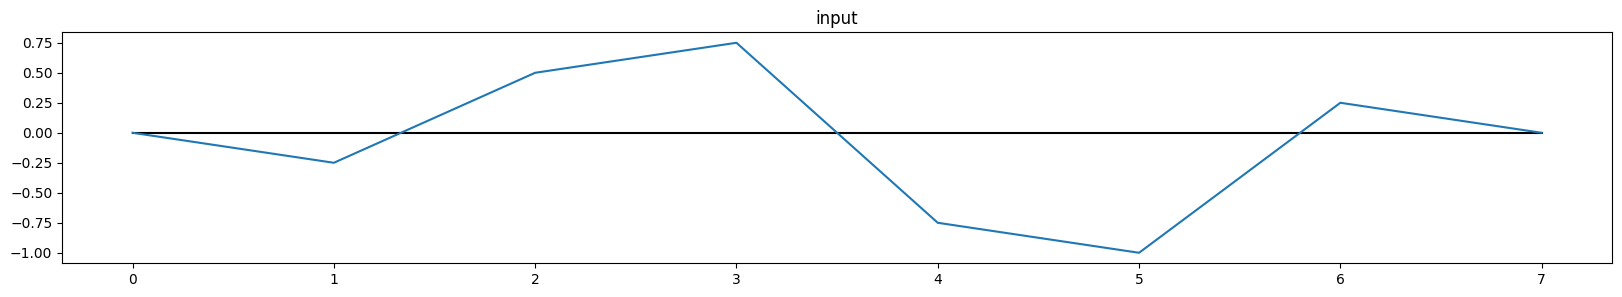

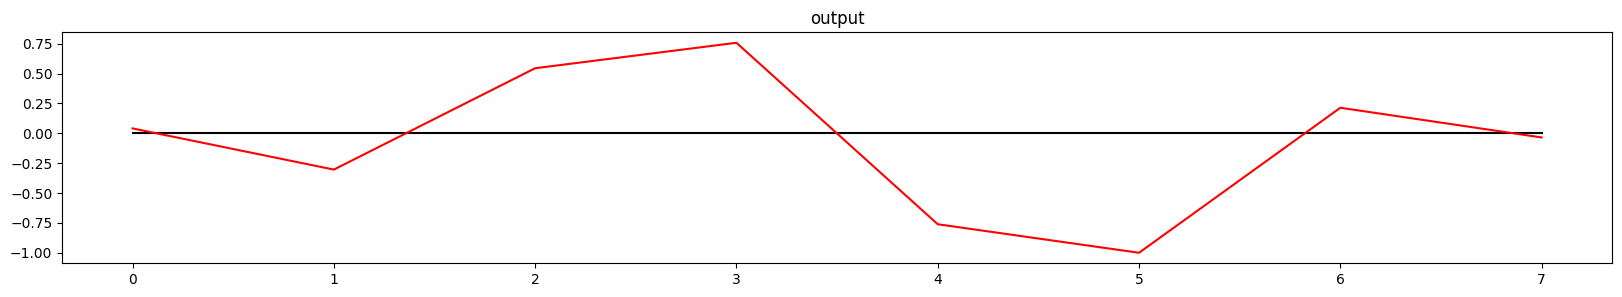

In [19]:
qsound_qpam.reconstruct_audio()
qsound_qpam.plot_audio()

You might notice that the reconstructed signal is not perfect. This is the case for QPAM and SQPAM, as they have proabilistic retrieval characteristics. This means: The higher the amount of experiments (`shots`), the higher the precision of the reconstructed signal will be:

In [20]:
qsound_qpam.output

array([ 0.04067286, -0.30393966,  0.54418263,  0.75712834, -0.76125327,
       -1.        ,  0.21346611, -0.03511659])

In [21]:
qsound_qpam.input

array([ 0.  , -0.25,  0.5 ,  0.75, -0.75, -1.  ,  0.25,  0.  ])

In [22]:
# Reconstrunction Error
sum(qsound_qpam.output - qsound_qpam.input)

np.float64(-0.04485957743831814)

**SQPAM**

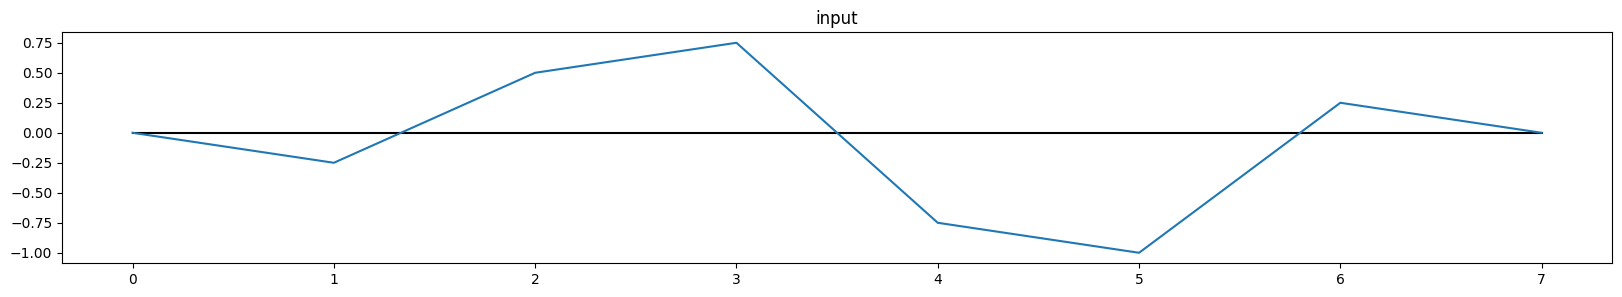

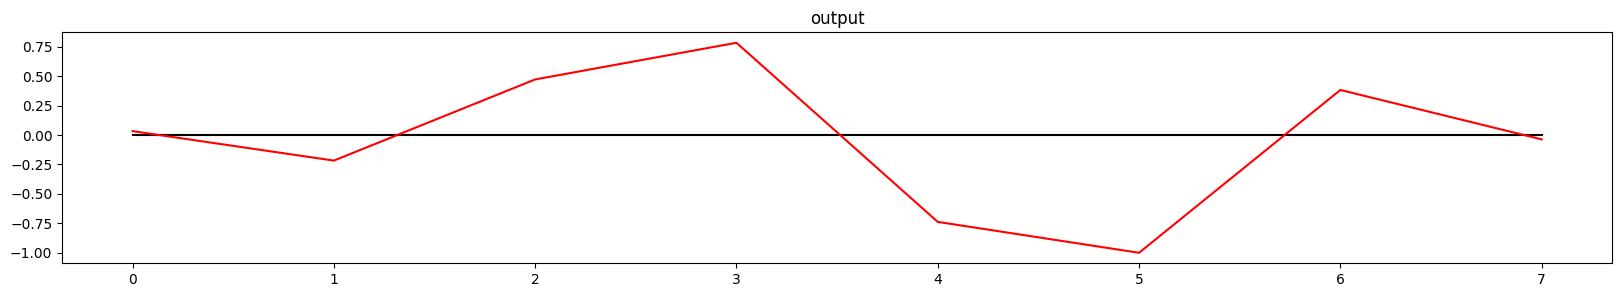

In [23]:
qsound_sqpam.reconstruct_audio()
qsound_sqpam.plot_audio()

In [24]:
# Reconstrunction Error
sum(qsound_sqpam.output - qsound_sqpam.input)

np.float64(0.17765041664637793)

**QSM**

Note: QSM has a deterministic retrieval procedure, hence, perfect reconstruction

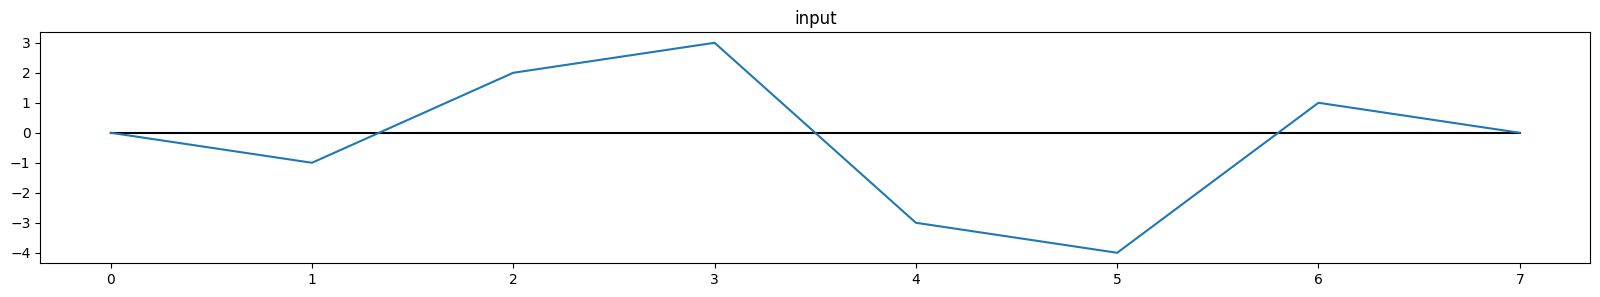

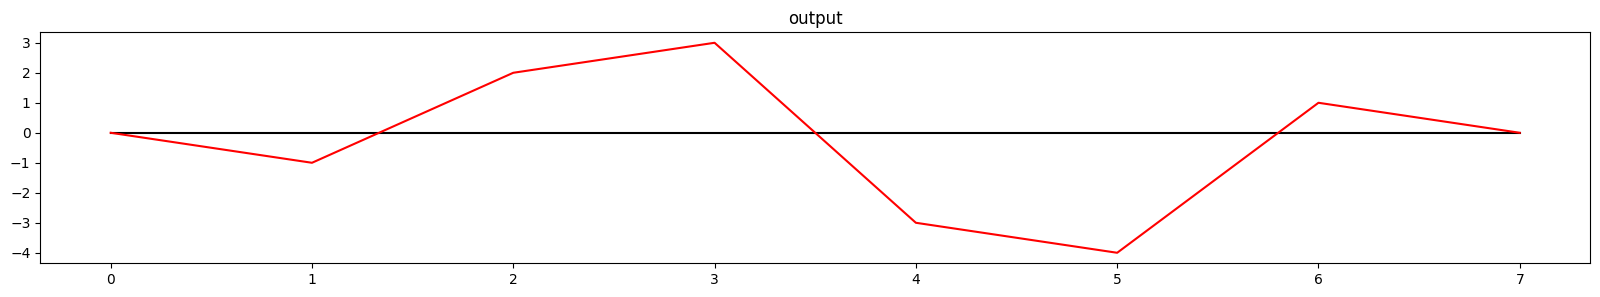

In [25]:
qsound_qsm.reconstruct_audio()
qsound_qsm.plot_audio()

In [26]:
# Reconstrunction Error
sum(qsound_qsm.output - qsound_qsm.input)

np.int64(0)

Finally, listen to the output with `listen()` (in this case, the output is too short to be heard):

In [27]:
sample_rate = 3000
qsound_qpam.listen(sample_rate)

For one-liners, this whole process can be written, for any representation, as:

For this input, the QPAM representation will require:
         3 qubits for encoding time information and 
         0 qubits for encoding ampĺitude information.


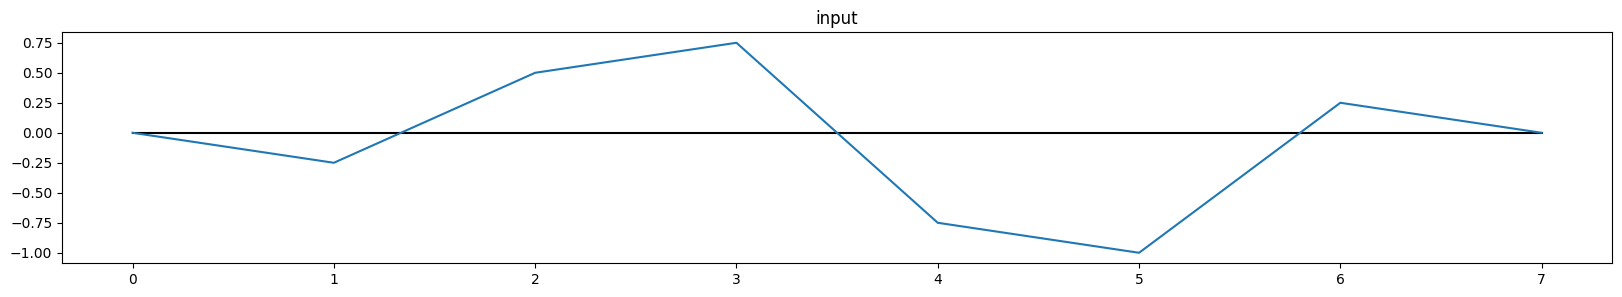

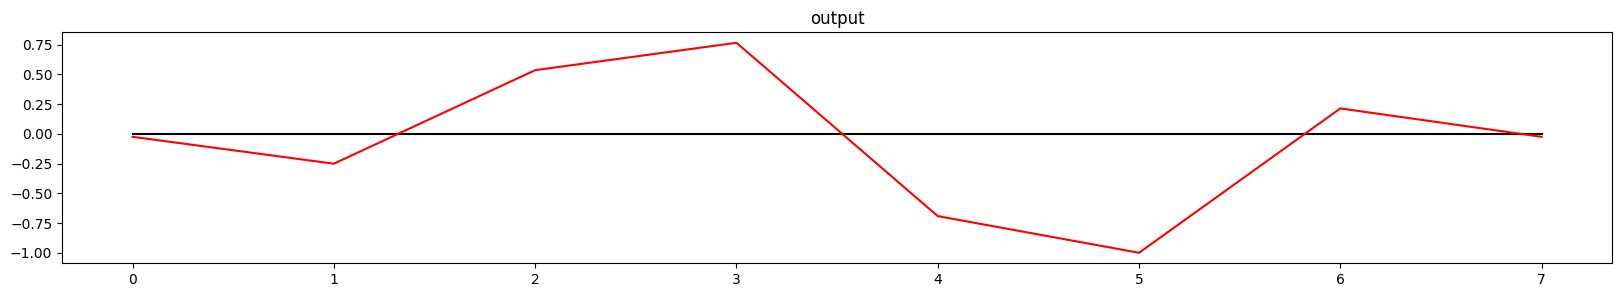

In [28]:
qsound = qa.QuantumAudio('qpam')
qsound.load_input(quantized_ditial_audio, 3).prepare().measure().run(1000).reconstruct_audio().plot_audio()

This summarizes the introduction to the *quantumaudio* module. For more functionalities and potential applications, refer to the [documentation](https://quantumaudio.readthedocs.io/en/latest/) and to the [Github Repository Readme file](https://github.com/iccmr-quantum/quantumaudio).

.

.

Download this notebook from the latest [Github release](https://github.com/iccmr-quantum/quantumaudio/releases).

Itaborala @ ICCMR Quantum https://github.com/iccmr-quantum/quantumaudio